# Titanic Survive Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import math

from pandas import Series, DataFrame
from pylab import rcParams

from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

## Importing Data

In [3]:
address = 'titanic-training-data.csv'
titanic_training = pd.read_csv(address)
titanic_training.columns = ['PassengerID', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [4]:
print(titanic_training.head())

   PassengerID  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)  --CATEGORICAL DATA

## Data Preparation

### 1. Checking that target is binary

In [6]:
titanic_training['Survived'].unique()

array([0, 1], dtype=int64)

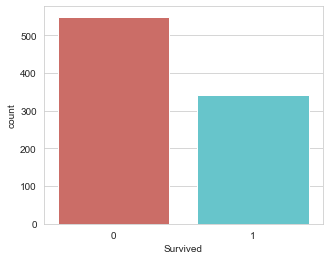

In [7]:
sb.countplot(x = 'Survived', data= titanic_training, palette='hls')

### 2. Checking for missing values

In [8]:
titanic_training.isna().sum()

PassengerID      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic_training.describe()

,PassengerID,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. Taking care of missing values

- since 'Name', 'Ticket', 'Cabin' columns data are irrevelant for predicting survivability...so we candrop these.
- also cabin has many null values and also this column is irrevelant.
- so we should drop yhese columns from our dataset.

- What about 'Age', since it is very good predictor. so we should do some approximations so that we can fill those missing values.

In [10]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [11]:
titanic_data.head()

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


## Treating missing values

### 1. Inputing missing values

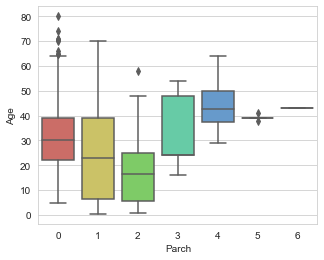

In [13]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')

In [14]:
Parch_groups = titanic_data.groupby(titanic_data['Parch']).mean()

In [15]:
Parch_groups

,PassengerID,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [16]:
Parch_groups.loc[0]['Age'], math.floor(Parch_groups.loc[0]['Age'])

(32.17850287907869, 32)

In [17]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        return math.floor(Parch_groups.loc[Parch]['Age'])
    else:
        return (Age)

In [18]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)

In [19]:
titanic_data

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,17.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [20]:
titanic_training

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
titanic_data.isnull().sum()

PassengerID    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [23]:
titanic_data.dropna(inplace = True)
titanic_data.reset_index(inplace= True, drop = True)

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


## Re-encode Variables

### 1. Converting categorical variables to a dummy indicator

- we have to reformat 'Sex' and 'Embarked' variables into numeric variables.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_enc = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_enc.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [26]:
titanic_data.head()

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [27]:
gender_df = pd.DataFrame(gender_encoded, columns = ['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [28]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_enc.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [29]:
from sklearn.preprocessing import OneHotEncoder

binary_enc = OneHotEncoder(categories = 'auto')

embarked_1hot = binary_enc.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()

In [30]:
embarked_df = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [31]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace = True)

In [32]:
titanic_data.head()

,PassengerID,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [33]:
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df], axis = 1, verify_integrity = True).astype(float)

In [34]:
titanic_dmy[0:10]

,PassengerID,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0
5,6.0,0.0,3.0,32.0,0.0,0.0,8.4583,1.0,0.0,1.0,0.0
6,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,1.0,0.0,0.0,1.0
7,8.0,0.0,3.0,2.0,3.0,1.0,21.0750,1.0,0.0,0.0,1.0
8,9.0,1.0,3.0,27.0,0.0,2.0,11.1333,0.0,0.0,0.0,1.0
9,10.0,1.0,2.0,14.0,1.0,0.0,30.0708,0.0,1.0,0.0,0.0


## Validating Dataset

#### -> Checking for independance btw features

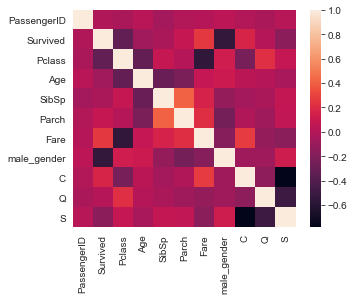

In [35]:
sb.heatmap(titanic_dmy.corr())

- we have to look for **light** for **dependent**
- we have to look for **dark** for **independent**

- since, from above we can see that 'Fare' and 'Pclass' are **dark** together which means they are highly dependent on each other.
- for satisfying conditions for Logistic Regression Model we need to have independancy between features.
- So, we will have to remove these features

In [36]:
titanic_dmy.drop(['Fare', 'Pclass'], axis=1, inplace = True)

In [37]:
titanic_dmy[0:10]

,PassengerID,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0
5,6.0,0.0,32.0,0.0,0.0,1.0,0.0,1.0,0.0
6,7.0,0.0,54.0,0.0,0.0,1.0,0.0,0.0,1.0
7,8.0,0.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0
8,9.0,1.0,27.0,0.0,2.0,0.0,0.0,0.0,1.0
9,10.0,1.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0


#### -> Now, check whether every predictive feature has minimum of 50 data

In [38]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


## Model Deployment

#### -> Now it's time to break our data into training and test set.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1), titanic_dmy['Survived'],
                                                    test_size = 0.2, random_state=183)

In [40]:
print(X_train.shape, y_train.shape)

(711, 8) (711,)


In [41]:
X_train[0:10]

,PassengerID,Age,SibSp,Parch,male_gender,C,Q,S
479,481.0,9.0,5.0,2.0,1.0,0.0,0.0,1.0
696,698.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0
333,335.0,32.0,1.0,0.0,0.0,0.0,0.0,1.0
820,822.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0
604,606.0,36.0,1.0,0.0,1.0,0.0,0.0,1.0
70,72.0,16.0,5.0,2.0,0.0,0.0,0.0,1.0
10,11.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0
122,124.0,32.5,0.0,0.0,0.0,0.0,0.0,1.0
509,511.0,29.0,0.0,0.0,1.0,0.0,1.0,0.0
25,26.0,38.0,1.0,5.0,0.0,0.0,0.0,1.0


#### -> Deploying and Evaluating this model.

In [42]:
LogReg = LogisticRegression(solver = 'liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred1 = LogReg.predict(X_test)

#### -> Classification report without cross-validation

In [44]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       115
         1.0       0.79      0.71      0.75        63

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



#### -> k-cross validation & confusion matrices

In [45]:
y_pred2 = cross_val_predict(LogReg, X_train, y_train, cv=5)

In [46]:
print(confusion_matrix(y_train, y_pred2))

[[369  65]
 [ 92 185]]


- Here, 369 and 185 are the number of correct predictions.
- 92 and 65 are the number of incorrect predictions.

In [47]:
precision_score(y_train, y_pred2), recall_score(y_train, y_pred2)

(0.74, 0.6678700361010831)

## Test Prediction

In [48]:
titanic_dmy[863:864]

,PassengerID,Survived,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
test_passenger = np.array([866, 42, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]).reshape(1,-1)

In [50]:
print(LogReg.predict(test_passenger))

[1.]


In [51]:
print(LogReg.predict_proba(test_passenger))

[[0.30640479 0.69359521]]
